People use credit cards everyday and all the usage information is collected by credit card companies. Americans currently have 511.4 million credit cards and 61% of American consumers have at least one credit card, while the average person has four. Credit Card Issuing in the US Market reached 98.9 billion dollars in 2021.

The purpose of this analysis is to tackle the business problem of how credit card users are segmented. With this project’s analysis, advertisement companies could use these credit card users segments to improve marketing strategies such as campaign distribution optimization. Banks can also use this analysis to prevent credit card fraud, payment default and credit limit management problems with further analysis in the future.


The dataset was obtained from Kaggle: https://www.kaggle.com/arjunbhasin2013/ccdata
Relevant attributes (columns) to focus on in our analysis are:
BALANCE : Balance amount left in their account to make purchases
PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one-go
INSTALLMENTSPURCHASES : Amount of purchase done in installment
CASHADVANCE : Cash in advance given by the user
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CREDITLIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
TENURE : Tenure of credit card service for user


The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

# Import

In [47]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.3 MB/s 
     |████████████████████████████████| 1.1 MB 21.3 MB/s 
     |████████████████████████████████| 18.2 MB 255 kB/s 
     |████████████████████████████████| 76 kB 4.0 MB/s 
     |████████████████████████████████| 140 kB 46.5 MB/s 
     |████████████████████████████████| 837 kB 48.8 MB/s 
     |████████████████████████████████| 830 kB 51.8 MB/s 
     |████████████████████████████████| 822 kB 47.6 MB/s 
     |████████████████████████████████| 802 kB 47.9 MB/s 
     |████████████████████████████████| 802 kB 33.9 MB/s 
     |████████████████████████████████| 793 kB 11.6 MB/s 
     |████████████████████████████████| 793 kB 47.8 MB/s 
     |████████████████████████████████| 791 kB 47.0 MB/s 
     |████████████████████████████████| 786 kB 36.2 MB/s 
     |████████████████████████████████| 779 kB 46.8 MB/s 
     |█████████████████████████████

In [1]:
! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import scikitplot as skplt
from umap import UMAP

# scipy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

# scikit
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

# Load dataset

In [3]:
 credit_card = pd.read_csv("CC GENERAL.csv")

In [4]:
credit_card.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit_card.shape

(8950, 18)

In [6]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Our data set consists of 8950 rows and 18 columns. Each row represents an individual credit card user.

In [7]:
credit_card.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Exploratory Data Analysis, Data Cleaning, and Preprocessing

In [8]:
credit_card.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 313 missing values in MINIMUM_PAYMENTS column and 1 missing value in CREDIT_LIMIT column.

We drop the only one missing value in CREDIT_LIMIT column.

As for MINIMUM_PAYMENTS column, we use mean value to replace the missing values.

In [9]:
credit_card.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [10]:
credit_card['MINIMUM_PAYMENTS'].fillna(credit_card['MINIMUM_PAYMENTS'].mean(), inplace=True)

Customer ID seems to be an unique id for each customer and hence won't play any role in our further analysis, so we drop this column.

In [11]:
credit_card.drop(['CUST_ID'], axis=1, inplace=True)

After cleaning, there are now 8949 rows and 17 columns, and no missing values.

In [12]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [13]:
credit_card.shape

(8949, 17)

Let's review the correlation.

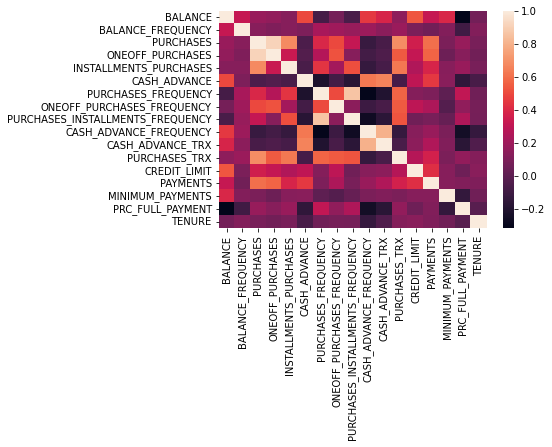

In [14]:
correlation = credit_card.corr()
sns.heatmap(correlation)
plt.show()

From the heatmap, we can see Balance has a higher level of correlation with Cash Advance, Cash Advance Frequency and Credit Limit. Payments variable has a high correletion with Purchases and one off Purchases. Tenure has a negative correlation with Cash Advance and Cash Advance Frequency variables.

# Feature Enginnering

## StandardScale

In [15]:
sc = StandardScaler()
sc.fit(credit_card)
Xs = sc.transform(credit_card)

## PCA

In [16]:
pca = PCA()
pca.fit(Xs)
pcs = pca.transform(Xs)

In [17]:
pcs.shape

(8949, 17)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


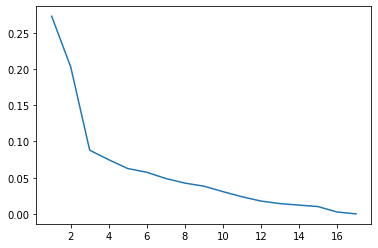

In [18]:
varexp = pca.explained_variance_ratio_
sns.lineplot(range(1, len(varexp)+1), varexp)
plt.show()

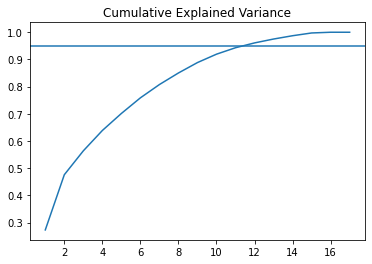

In [19]:
plt.title("Cumulative Explained Variance")
plt.plot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(.95)
plt.show()

## KMeans clustering

We use elbow method and Silhouette score to choose the optimal number of clusters.

Elbow method:

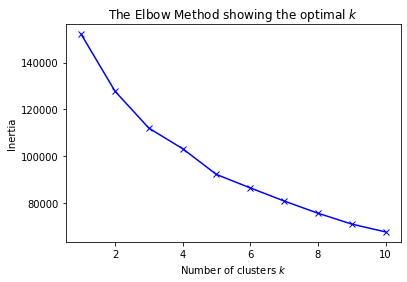

In [20]:
wss = []
for i in range(1,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(Xs)
    wss.append(fitx.inertia_)

plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

Silhouette score:

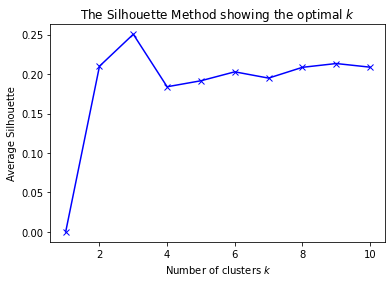

In [21]:
from sklearn.metrics import silhouette_score

scores = [0]
for i in range(2,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(Xs)
    score = silhouette_score(Xs, fitx.labels_)
    scores.append(score)

plt.plot(range(1,11), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('The Silhouette Method showing the optimal $k$')
plt.show()

From these two graphs, we could see that the optimal number of clusters is around 3.

In [22]:
#set.seed(810)

#define the cluster
k3 = KMeans(3)

# fit the model
k3.fit(Xs)

# predict the cluster label

labels = k3.labels_

In [23]:
# how many iterations were actully run?
k3.n_iter_

30

In [24]:
clusters=pd.concat([credit_card, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.304943,0.000000,12.0,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.0


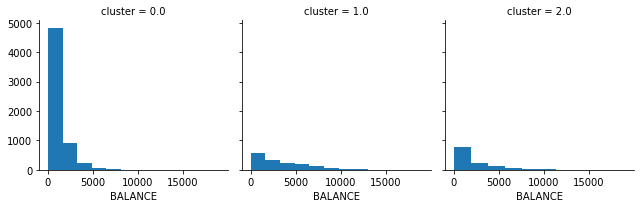

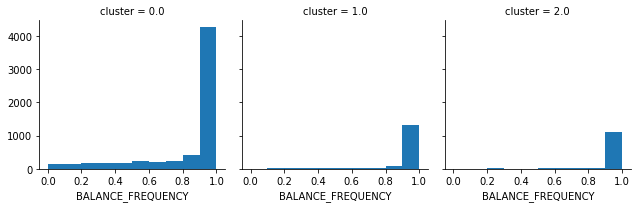

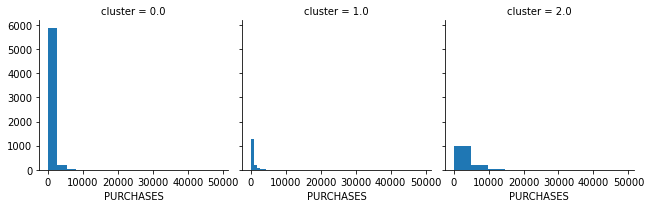

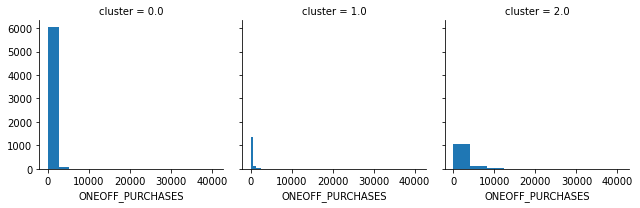

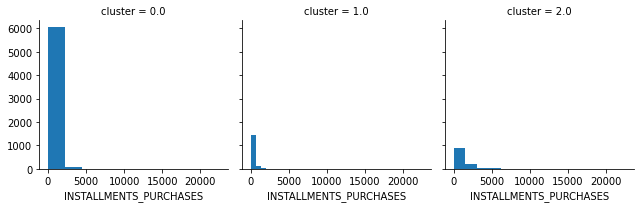

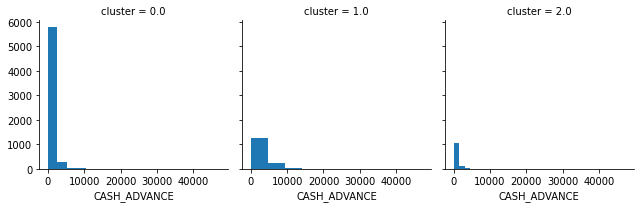

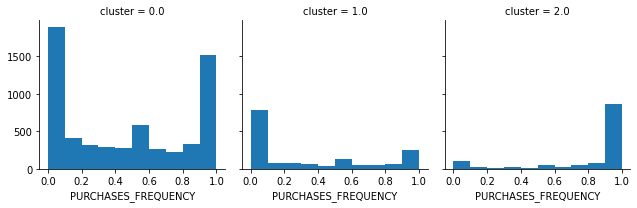

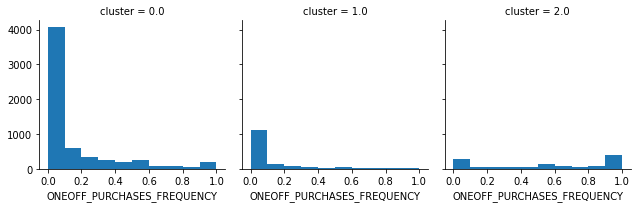

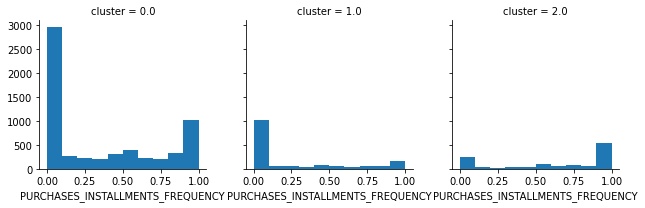

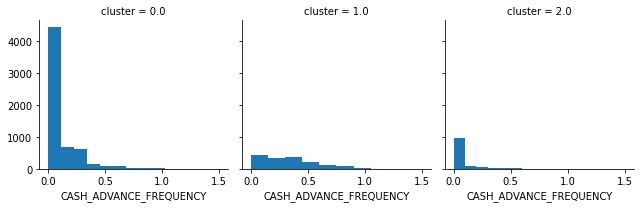

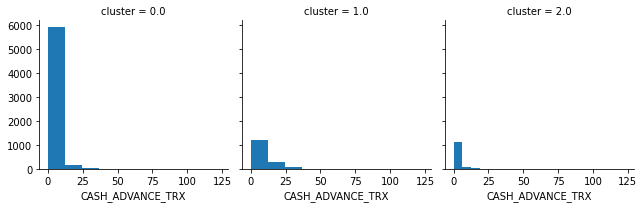

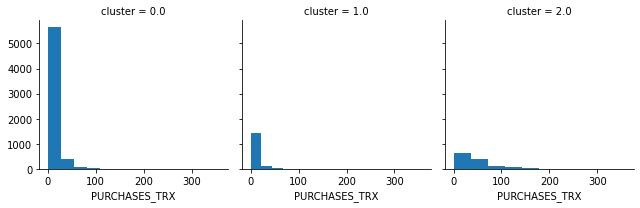

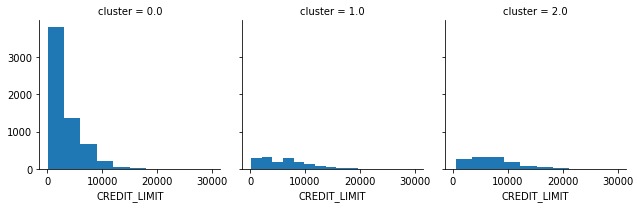

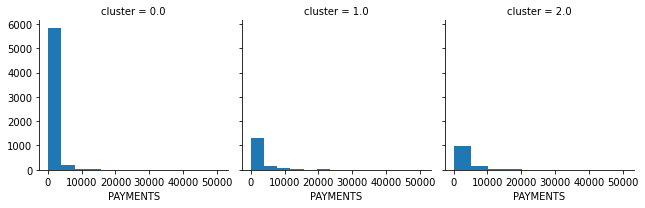

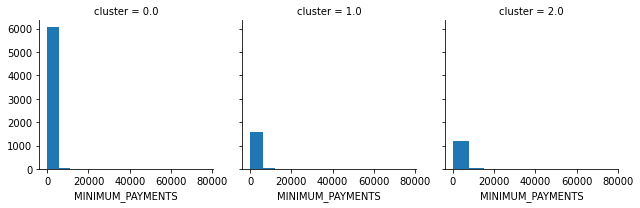

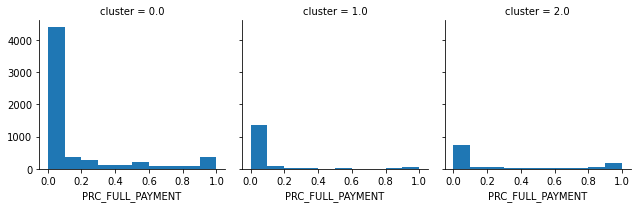

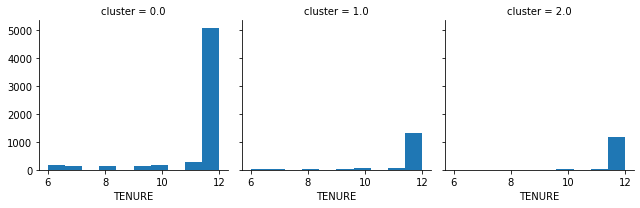

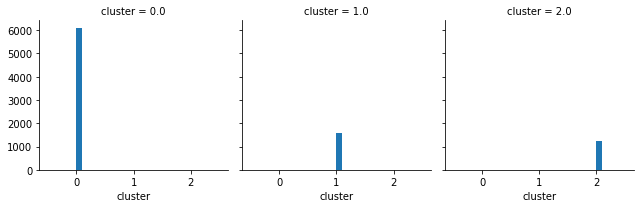

In [25]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [26]:
cc = credit_card.copy()
cc['k3'] = labels

Text(0, 0.5, 'PCA 2')

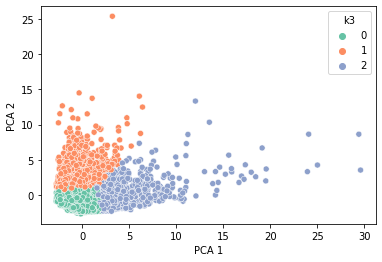

In [27]:
sns.scatterplot(data=cc, x=pcs[:, 0], y=pcs[:, 1], hue="k3", palette="Set2")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [28]:
cc["k3"].value_counts()

0    6117
1    1597
2    1235
Name: k3, dtype: int64

## Hierarchical Clustering

In [29]:
hc = linkage(Xs, method = "ward")

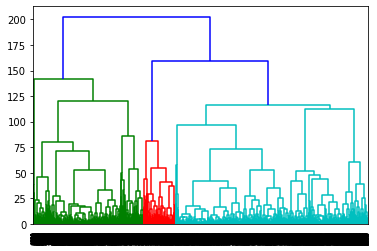

In [30]:
dendrogram(hc)
plt.show()

In [31]:
len(hc)

8948

## Using PCA/TSNE/UMAP to visualize clusters

#### PCA

In [32]:
pca = PCA(0.9)
pca.fit(Xs)
pcs = pca.transform(Xs)

In [33]:
comps = pcs[:, :2]
comps.shape

(8949, 2)

In [34]:
pdata = pd.DataFrame(comps, columns=['pc1', 'pc2'])
pdata['label'] = labels

pdata.head(3)

,pc1,pc2,label
0,-1.682360,-1.076720,0
1,-1.138968,2.506112,1
2,0.969377,-0.383427,0


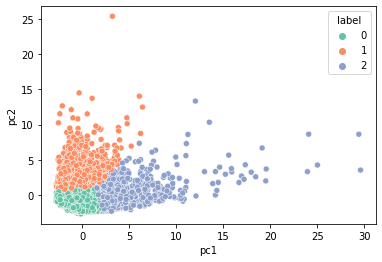

In [35]:
sns.scatterplot(x="pc1", y="pc2", hue="label", data=pdata, palette="Set2")

#### TSNE

In [36]:
# two step process - use PCA to reduce, then tsne for embeddings (2d)
pca.n_components_

10

In [37]:
pcs.shape

(8949, 10)

In [38]:
tsne = TSNE(random_state=123)
tsne.fit(pcs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE(random_state=123)

In [39]:
te = tsne.embedding_

In [40]:
te.shape

(8949, 2)

In [41]:
tdata = pd.DataFrame(te, columns=["e1", "e2"])
tdata['label'] = labels

tdata.head(3)

,e1,e2,label
0,5.407263,27.996840,0
1,51.046764,-35.676743,1
2,-13.385386,-35.465141,0


In [42]:
tdata['label'].value_counts()

0    6117
1    1597
2    1235
Name: label, dtype: int64

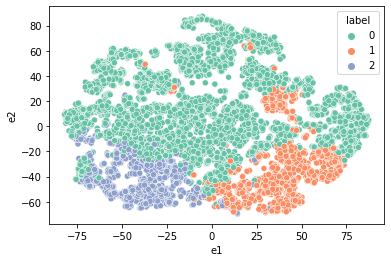

In [43]:
sns.scatterplot(x="e1", y="e2", hue="label", data=tdata, palette="Set2")

#### UMAP

In [49]:
u = UMAP(random_state=123)
u.fit(Xs)
embeds = u.transform(Xs)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [50]:
embeds.shape

(8949, 2)

In [51]:
umap_df = pd.DataFrame(embeds, columns=["x","y"])
umap_df['label'] = labels
umap_df.head(3)

,x,y,label
0,4.756752,3.435917,0
1,8.277637,7.934576,1
2,2.893237,9.598497,0


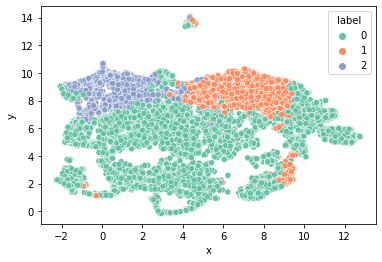

In [52]:
sns.scatterplot(x="x", y="y", hue="label", data=umap_df, palette="Set2")

## KMeans on new variables-use PCA to create new variables

#### PCA

In [53]:
pca = PCA(0.9)
pca.fit(Xs)
pcs = pca.transform(Xs)

In [54]:
pcs.shape

(8949, 10)

In [55]:
comps = pcs[:, :2]
comps.shape

(8949, 2)

In [56]:
pdata = pd.DataFrame(comps, columns=['pc1', 'pc2'])
pdata.head()

,pc1,pc2
0,-1.682360,-1.076720
1,-1.138968,2.506112
2,0.969377,-0.383427
3,-0.873809,0.042936
4,-1.599682,-0.688770


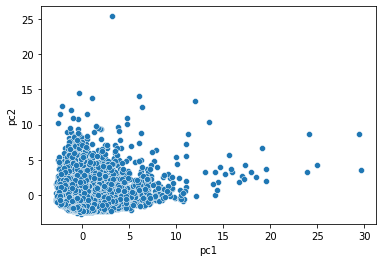

In [57]:
sns.scatterplot(data=pdata,x='pc1',y='pc2', palette="Set2")

In [58]:
#define the cluster
k3 = KMeans(n_clusters=3, random_state=123)

# fit the model
k3.fit(pcs)

# predict the cluster label
k3_labs = k3.predict(pcs)

In [59]:
pdata['labels'] = k3_labs

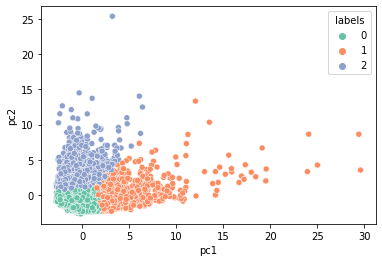

In [60]:
sns.scatterplot(data=pdata,x='pc1',y='pc2',hue='labels', palette="Set2")

#### UMAP 

In [61]:
pca = PCA()
pca.fit(Xs)
pcs = pca.transform(Xs)

In [62]:
u = UMAP(random_state=123)
u.fit(Xs)
embeds = u.transform(Xs)

In [63]:
umap_df = pd.DataFrame(embeds, columns=["x","y"])
umap_df.head()

,x,y
0,4.756752,3.435917
1,8.277637,7.934576
2,2.893237,9.598497
3,5.089612,2.518816
4,6.136083,3.876877


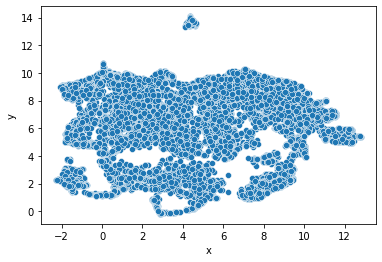

In [64]:
sns.scatterplot(data=umap_df,x='x',y='y')

In [65]:
#define the cluster
k3 = KMeans(n_clusters=3, random_state=123)

# fit the model
k3.fit(umap_df)

# predict the cluster label
k3_labs = k3.predict(umap_df)

In [66]:
umap_df['labels'] = k3_labs

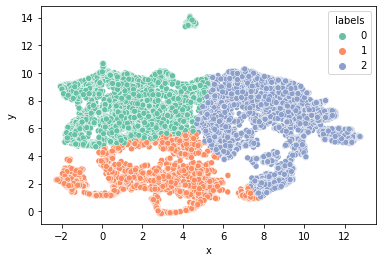

In [67]:
sns.scatterplot(data=umap_df,x='x',y='y',hue='labels', palette="Set2")

#### TSNE

In [68]:
tsne = TSNE(random_state=123)
tsne.fit(pcs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE(random_state=123)

In [69]:
te = tsne.embedding_

In [70]:
tdata = pd.DataFrame(te, columns=["e1", "e2"])
tdata.head()

,e1,e2
0,-1.514577,30.189165
1,56.534451,-11.345562
2,-1.870346,-35.013168
3,-6.600592,47.634125
4,4.835211,21.956371


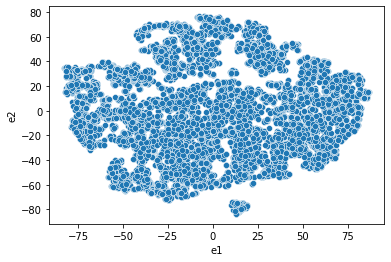

In [71]:
sns.scatterplot(data=tdata,x='e1',y='e2')

In [72]:
#define the cluster
k3 = KMeans(n_clusters=3, random_state=123)

# fit the model
k3.fit(tdata)

# predict the cluster label
k3_labs = k3.predict(tdata)

In [73]:
tdata['labels'] = k3_labs

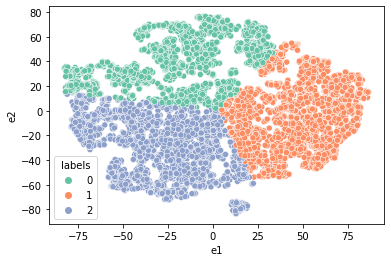

In [74]:
sns.scatterplot(data=tdata,x='e1',y='e2',hue='labels', palette="Set2")